# ADN_T007 · Molecular Similarity

Authors:

- Adnane Aouidate, 2022, Structural Bioinformatics and Chemoinformatics, Institute of Organic and Analytical Chemistry (ICOA), Orléans, France.

## Aim of this Notebook

**Introduction**

The aim of this tutorial is to calculate similarity between molecules using either molecular fingerprints. Molecular fingerprints are binary vectors that represent the topological features of molecules.

Both molecular descriptors and molecular fingerprints can be used to calculate the similarity between molecules. The similarity between two molecules can be used to measure how similar they are in terms of their chemical properties. This information can be used for a variety of tasks, such as drug discovery, materials design, and environmental analysis.

**Tutorial Overview**

This tutorial will use the RDKit Python library to calculate the similarity between molecules. The RDKit is a powerful cheminformatics library that provides a variety of tools for working with molecules.

The tutorial will be divided into three parts. The first part will show how to read SDF files. 
The second part will cover the basics of molecular fingerprints. 
The third part will show how to use the RDKit to calculate the similarity between molecules using molecular descriptors and molecular fingerprints.

**Prerequisites**

This tutorial assumes that you have a basic understanding of Python and the RDKit library. If you are not familiar with these topics, I recommend that you review the following resources:
* Anaconda : https://www.anaconda.com/download
* RDKit Documentation: https://www.rdkit.org/docs/

**Getting Started**

To get started with this tutorial, you will need to install the RDKit library. You can do this by following the instructions on the RDKit website.

Once you have installed the RDKit library, you can open the Jupyter notebook for this tutorial. The Jupyter notebook can be found in the `Chemoinformatics-tutos` directory.


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, DataStructs, AllChem, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path

In [3]:
HERE = Path(_dh[-1])

## Read moleucles from SDF file

In [4]:
mols = []
names = []
for mol in Chem.SDMolSupplier('data-test.sdf'):
    if mol is not None :
        mols.append(mol)
        names.append(mol.GetProp('_Name'))
len(mols)

50

## Read moleucles from SDF file using Pandatools

In [5]:
datafile = PandasTools.LoadSDF('data-test.sdf', molColName='Molecule' )

## Calculation of molecular similarities

### Calculate the fingerprints

Now calculate a variety of properties using RDKit, adding them to the end of the dataframe. you can choose which properties to add, we have added Morgan Finger Prints in this tutorial.

In [6]:
fplist = [] #fplist
for mol in mols:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fplist.append(fp)

In [7]:
datafile['fps'] = fplist

,ID,Molecule,fps
0,Row0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Row1,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Row2,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

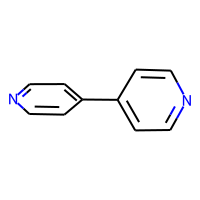
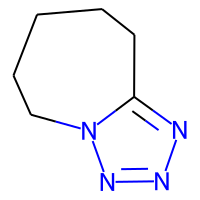
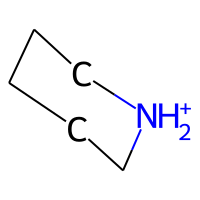

In [8]:
datafile.head(3)

In [9]:
#PandasTools.FrameToGridImage(datafile, column='Molecule', molsPerRow=5,subImgSize=(150,150), legendsCol= 'ID')

A small test Check the similarity between two molecules 

In [10]:
fp1=datafile.at[0,'fps']

In [11]:
fp2=datafile.at[1,'fps']

Using Dice

In [12]:
DataStructs.DiceSimilarity(fp1,fp2)

0.12121212121212122

Using Tanimoto

In [13]:
DataStructs.TanimotoSimilarity(fp1,fp2)

0.06451612903225806

In [14]:
for r in datafile.index:
    fp1 = datafile.at[r, "fps"]
    colName = datafile.at[r, 'ID']
    Simlist = []
    for mol in datafile["Molecule"]:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        sim = DataStructs.DiceSimilarity(fp1, fp)
        Simlist.append(sim)
    datafile[colName]=Simlist

### The similarity Matrix

In [16]:
Newdatafile = datafile.drop(['fps'], axis=1)

,ID,Molecule,Row0,Row1,Row2,Row3,Row4,Row5,Row6,Row7,...,Row40,Row41,Row42,Row43,Row44,Row45,Row46,Row47,Row48,Row49
0,Row0,,1.000000,0.121212,0.000000,0.000000,0.370370,0.032787,0.032787,0.025974,...,0.042553,0.070175,0.083333,0.078431,0.080000,0.042553,0.051282,0.057143,0.107143,0.060606
1,Row1,,0.121212,1.000000,0.193548,0.095238,0.105263,0.138889,0.138889,0.068182,...,0.068966,0.088235,0.067797,0.064516,0.098361,0.137931,0.080000,0.086957,0.089552,0.090909
2,Row2,,0.000000,0.193548,1.000000,0.137931,0.080000,0.067797,0.067797,0.053333,...,0.044444,0.036364,0.043478,0.040816,0.041667,0.088889,0.054054,0.060606,0.000000,0.064516
3,Row3,,0.000000,0.095238,0.137931,1.000000,0.000000,0.200000,0.200000,0.093023,...,0.071429,0.151515,0.105263,0.100000,0.067797,0.214286,0.125000,0.136364,0.000000,0.142857
4,Row4,,0.370370,0.105263,0.080000,0.000000,1.000000,0.060606,0.060606,0.024390,...,0.076923,0.064516,0.113208,0.071429,0.109091,0.038462,0.045455,0.050000,0.163934,0.052632
5,Row5,,0.032787,0.138889,0.067797,0.200000,0.060606,1.000000,0.820000,0.293103,...,0.209302,0.250000,0.252874,0.200000,0.224719,0.255814,0.205128,0.243243,0.126316,0.250000
6,Row6,,0.032787,0.138889,0.067797,0.200000,0.060606,0.820000,1.000000,0.327586,...,0.209302,0.250000,0.229885,0.200000,0.224719,0.255814,0.205128,0.243243,0.126316,0.250000
7,Row7,,0.025974,0.068182,0.053333,0.093023,0.024390,0.293103,0.327586,1.000000,...,0.215686,0.160714,0.194175,0.188679,0.190476,0.215686,0.212766,0.222222,0.108108,0.204545
8,Row8,,0.025316,0.066667,0.051948,0.090909,0.023810,0.288136,0.322034,0.880597,...,0.211538,0.157895,0.190476,0.185185,0.186916,0.211538,0.208333,0.239130,0.106195,0.200000
9,Row9,,0.025974,0.068182,0.053333,0.093023,0.024390,0.293103,0.327586,0.893939,...,0.215686,0.160714,0.194175,0.188679,0.190476,0.215686,0.212766,0.244444,0.108108,0.204545

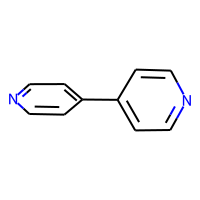
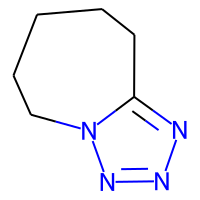
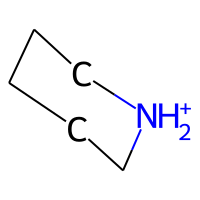
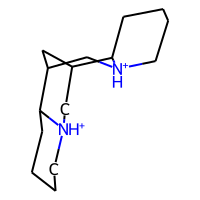
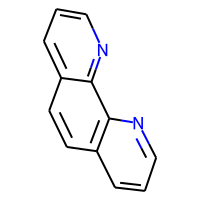
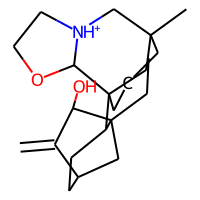
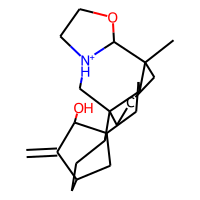
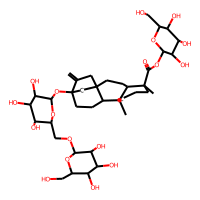
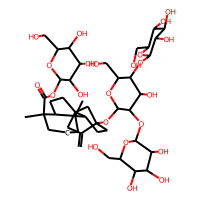
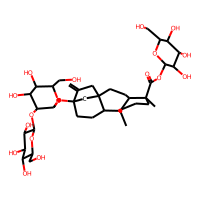
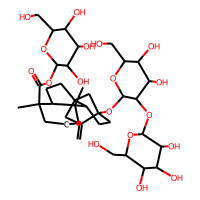
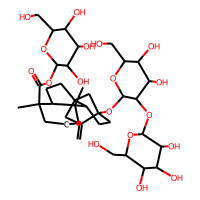
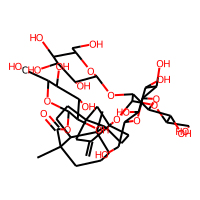
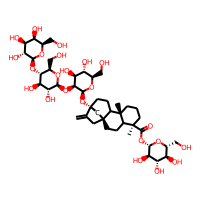
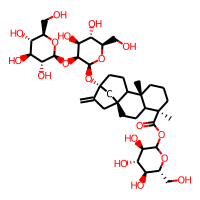
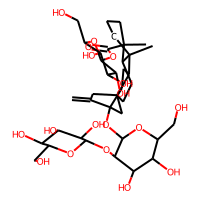
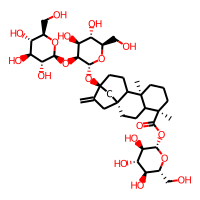
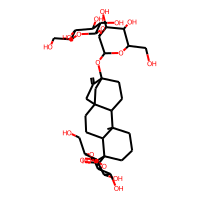
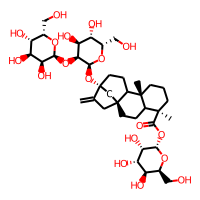
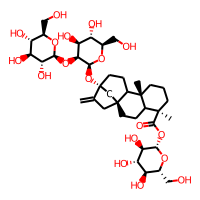
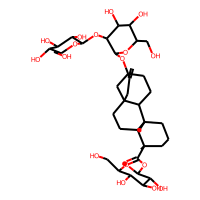
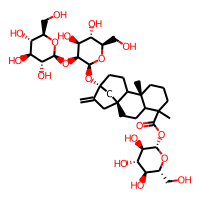
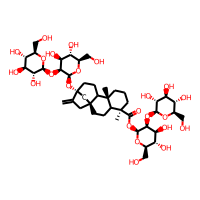
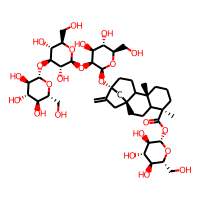
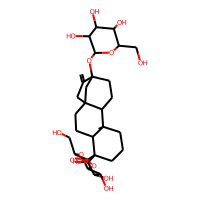
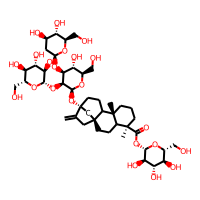
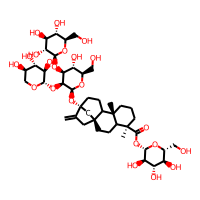
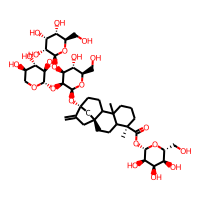
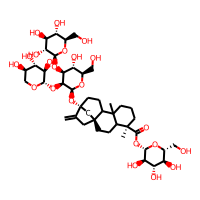
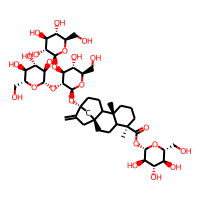
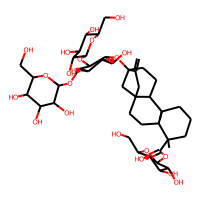
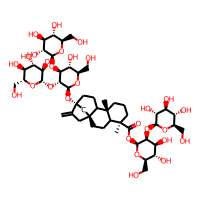
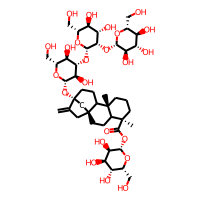
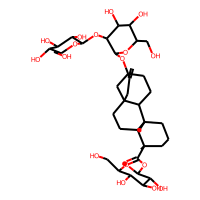
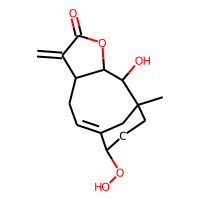
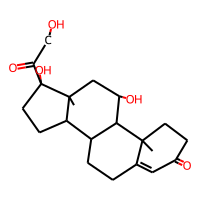
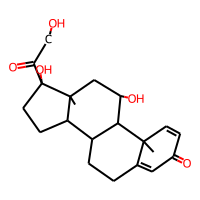
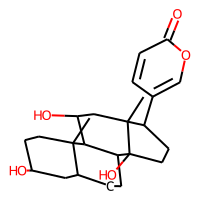
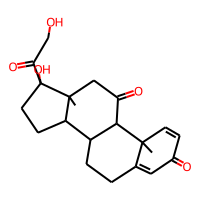
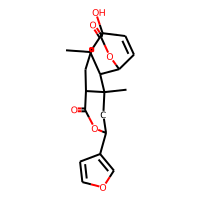
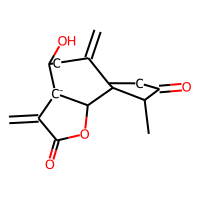
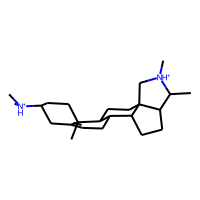
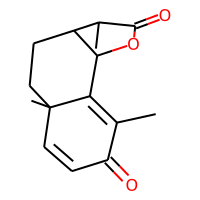
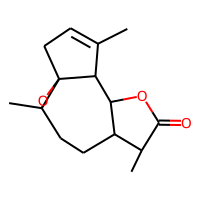
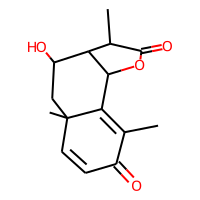
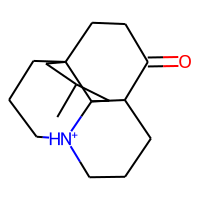
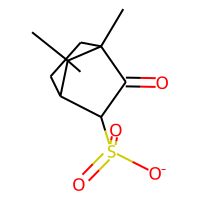
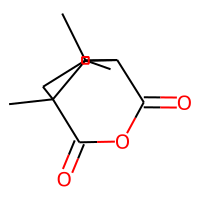
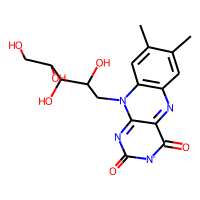
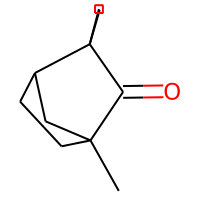

In [17]:
Newdatafile

## Contextual colouring of dataframe
We can also use contextual colouring on the dataframe, in this instance we are going to highlight similarity scores but it could be used to highlight affinity, IC50 or a calclated property like LogP.

You can create “heatmaps” with the background_gradient method. These require matplotlib, and here we use Seaborn to get a nice colormap.

In [18]:
import seaborn as sns

In [19]:
cm = sns.light_palette(color= 'green', as_cmap= True)
s = Newdatafile.style.background_gradient(cmap=cm)


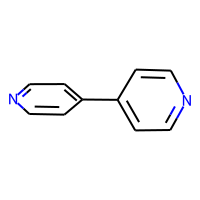
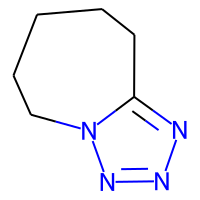
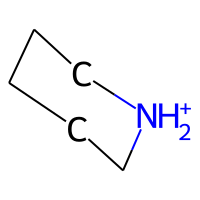
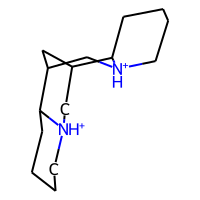
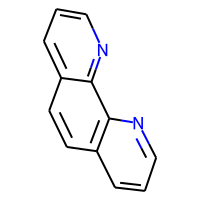
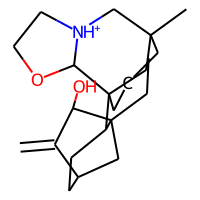
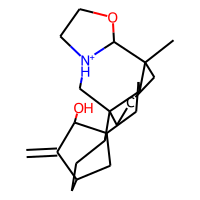
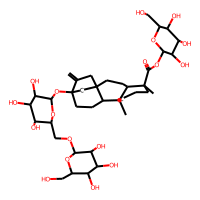
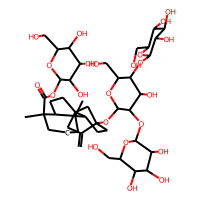
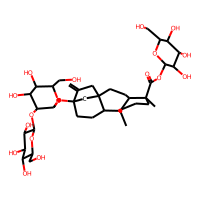
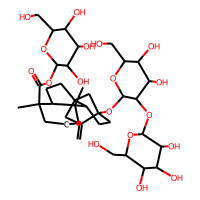
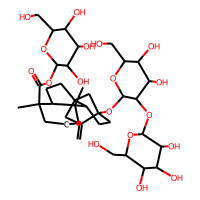
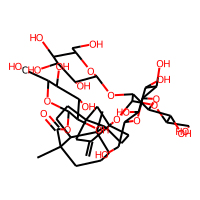
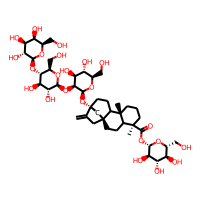
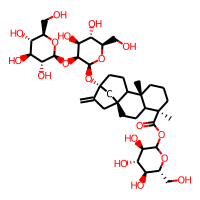
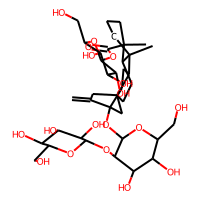
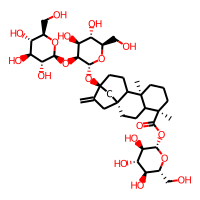
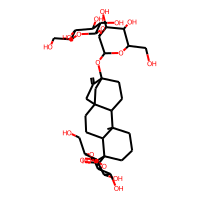
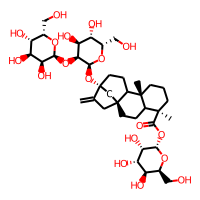
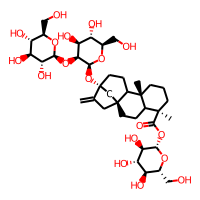
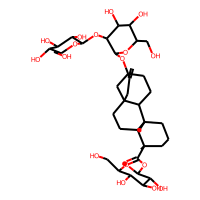
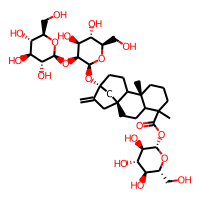
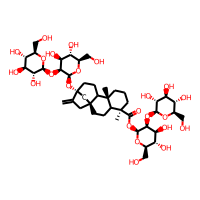
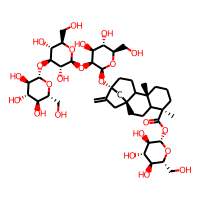
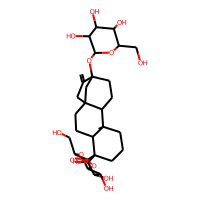
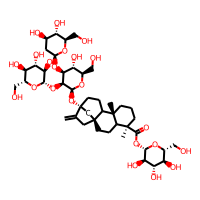
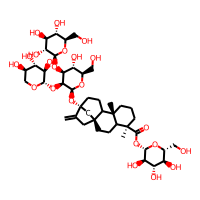
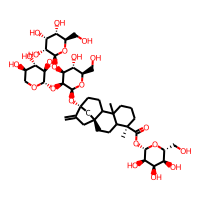
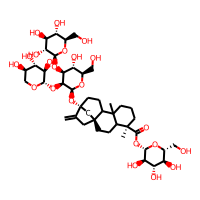
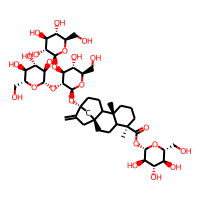
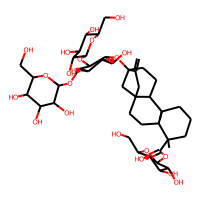
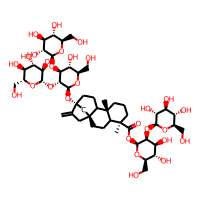
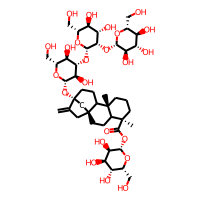
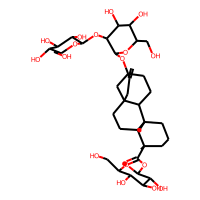
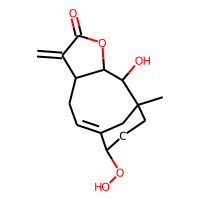
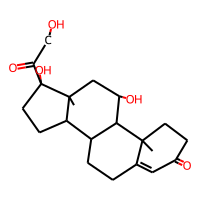
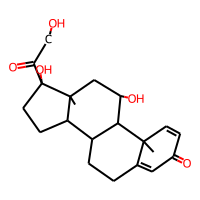
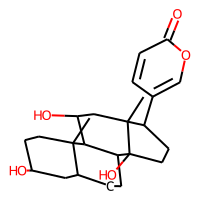
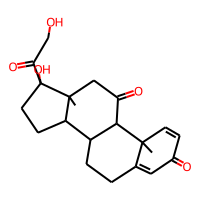
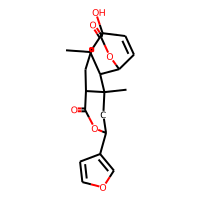
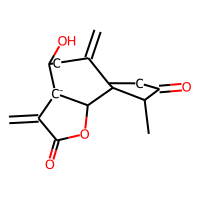
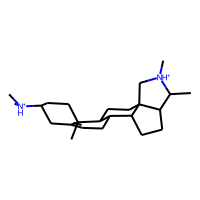
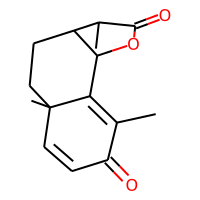
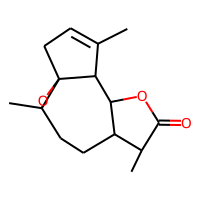
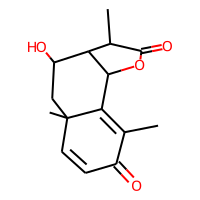
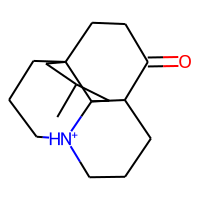
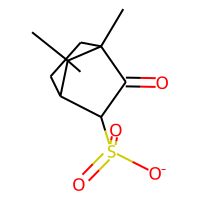
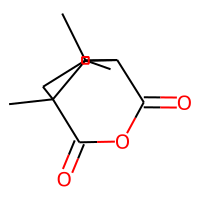
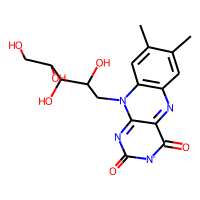
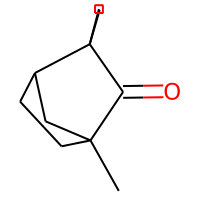

In [20]:
s

**Conclusion**

This tutorial has shown you how to calculate the similarity between molecules using molecular fingerprints. The RDKit library provides a variety of tools for working with molecules, and it can be used to perform a variety of tasks, such as drug discovery, materials design, and environmental analysis.

I hope you found this tutorial helpful. If you have any questions, please feel free to contact me.